# Shout outs

### Joshua: data cleaning

    df['price'] = df['price'].str.replace(',', '') # Remove the commas to normalize prices and puts the new value in price column
    df['price'] = df['price'].str.replace('$', '').astype(float) # Remove $ to normalize and changes from strings to floats to do math on them

    # Determine minumum price from price column
    min_price = df['price'].min()

    # get maximum price from price column
    max_price = df['price'].max()

    min_price # is -1, impossible
    max_price # Is 9995, that is possible.

    # select the column you want to find the bottom 50 values for - I want to see how many outliers we should remove
    prices = df['price']

    # use the nsmallest() method to get the bottom 50 values in the column
    bottom_95 = df.nsmallest(95, 'price') # There are 90 apartments <$100 a month , which is likely an error or not a monthly rate. Will remove them

    # print the bottom 50 values
    print(bottom_95)

### Paxton: modeling outliers

    # Replace price outliers with mean price
    import numpy as np
    z_scores = np.abs((apt_0["price"] - apt_0["price"].mean()) / apt_0["price"].std())
    outliers = apt_0[z_scores > 3]
    print(outliers)

    mean_price = apt_0["price"].mean()
    apt_0.loc[z_scores > 3, "price"] = mean_price


### Yiming: getting dummies


    # Get dummies for two categorized columns
    w_c_loc_dummies = pd.get_dummies(df["word_count_of_loc_category"])
    post_time_dummies = pd.get_dummies(df["post_time_category"])

    df= pd.concat([df,w_c_loc_dummies,post_time_dummies],axis=1)


### Yufei: efficient poker hand categorization

Yufei
    def hand_ranking(hand):

      '''
      Returns the ranking of a legal poker hand
      hand: a list contains strings of cards
      output: an integer on scale of 1 to 10 if hand is legal, 0 otherwise
      '''

      # illegal hands
      if legal_hand(hand) == False:
        return 0

      # sort the cards in descending order
      hand.sort(key = lambda x: deck.index(x), reverse = True)

      # get the value and suit of the ordered cards separately
      # replace the values with indices of order
      hand_value = list(map(lambda x: values.index(x[:-1]), hand))
      hand_suit = list(map(lambda x: x[-1], hand))

      # if flush
      if len(set(hand_suit)) == 1:
        if hand_value == [12, 11, 10, 9, 8]:
          return 10             # Royal Flush!
        elif hand_value[0] - hand_value[4] == 4:
          return 9             # Straight Flush!
        else:
          return 6             # Flush!

      # if not flush, check the values
      value_frequencies = list(map(lambda x: hand_value.count(x), hand_value))
      if max(value_frequencies) == 4:
        return 8               # Four-of-a-kind!
      elif max(value_frequencies) == 3:
        if min(value_frequencies) == 2:
          return 7             # Full House!
        else:
          return 4             # Three-of-a-kind
      elif max(value_frequencies) == 2:
        if sum(value_frequencies) == 9:
          return 3             # Two-pair
        else:
          return 2             # Pair
      elif max(value_frequencies) == 1:
        if hand_value[0] - hand_value[4] == 4:
          return 5             # Straight!
        else:
          return 1             # High card
      else:
        return 0


# Lesson 7

### Time data and forecasting

Dates and times are some of the most important, and also annoying, data you will deal with in Python. Dates and times are annoying and difficult in almost every programming language, and the reason is that humans are so inconsistent with dates and times. All of the following can be valid dates:

- 01-02-03 (January 2, 2003)
- 01-02-03 (February 3, 2001)
- 01-02-03 (February 1, 2003)

Although the content of the date string is the same in each case, it is interpreted differently based on the date formatting paradigm. We can annotate the above examples with YY for characters that denote years, MM for months, and DD for days:

- MM-DD-YY (common in America)
- YY-MM-DD (in descending order of magnitude)
- DD-MM-YY (reverse order of magnitude)

You don't have to stop at dates - you can get more specific:

- 01-02-03 1:30:45PM (45 seconds after 1:30 pm on January 2, 2003)
- 03-02-01 13:30:45 (same as the above)
- 03-02-01 13:30:45.103 (103 milliseconds after 45 seconds after 1:30pm)8iu8ghb

Fortunately, pandas has built-in functionality for handling much of what you'll need to do with dates.

In [ ]:
import pandas as pd
tmp_df = pd.DataFrame(
    {
        "date": ["2022-01-01","2022-01-02","2022-01-03","2022-01-04","2022-01-05"],
        "sales": ["1000000","1005000","1001000","1003000","1006000"]
    }
)
tmp_df["date"] = pd.to_datetime(tmp_df["date"])
tmp_df

In [ ]:
tmp_df = pd.DataFrame(
    {
        "date": ["2022-01-01 9:00:00AM","2022-01-01 9:01:00AM","2022-01-01 9:02:00AM","2022-01-01 9:03:00AM","2022-01-01 9:04:00AM"],
        "sales": ["10000","10050","10010","10030","10060"]
    }
)
tmp_df["date"] = pd.to_datetime(tmp_df["date"])
tmp_df

In [ ]:
tmp_df = pd.DataFrame(
    {
        "date": ["2022-01-01 9:00:00.0001AM","2022-01-01 9:00:00.0002AM","2022-01-01 9:00:00.0003AM","2022-01-01 9:00:00.0004AM","2022-01-01 9:00:00.0005AM"],
        "sales": ["10000","10050","10010","10030","10060"]
    }
)
tmp_df["date"] = pd.to_datetime(tmp_df["date"])
tmp_df

Pandas does a good job inferring that "2022-01-01" means january 1, 2022. But what if you gave it "22-01-01?"

In [ ]:
tmp_df = pd.DataFrame(
    {
        "date": ["22-01-01","22-01-02","22-01-03","22-01-04","22-01-05"],
        "sales": ["1000000","1005000","1001000","1003000","1006000"]
    }
)
tmp_df["date"] = pd.to_datetime(tmp_df["date"])
tmp_df

Now it thinks the format of the strings you're passing in is DD-MM-YY, when actually it's intended to be YY-MM-DD. You can fix this with the format parameter:

In [ ]:
tmp_df = pd.DataFrame(
    {
        "date": ["22-01-01","22-01-02","22-01-03","22-01-04","22-01-05"],
        "sales": ["1000000","1005000","1001000","1003000","1006000"]
    }
)
tmp_df["date"] = pd.to_datetime(tmp_df["date"],format="%y-%m-%d")
tmp_df

Now it gives the expected results. The formatting indicators are:

- %y for two-digit years
- %Y for four-digit years
- %m for months
- %d for days
- %H for hours
- %M for minutes
- %S for seconds
- %f for milliseconds

There are actually many more formatting indicators, including things like abbreviated or full weekday names, time zone names, and more. <a href="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior">You can read the full list here</a>.

In [8]:
import pandas as pd
thursday = pd.Timestamp("2023-03-23")
thursday + pd.Timedelta("1D") + pd.Timedelta("2:45:50")

Timestamp('2023-03-24 02:45:50')

In [ ]:
# examples of time series data

# date arithmetic
# loading and manipulating

    # resampling, like hours to days
    # rolling averages and other summary stats
# visualization
# forecasting

### Interpolation

What if you're missing a bunch of data in a time series? When we were missing data in non-time-series datasets (like age in the Titanic dataset) we had a few options:
- Remove the rows with missing data
- Fill in the missing values with something (e.g., the mean of the remaining data)
- Drop the column with missing data

With time series, we have these options as well, but it is often useful to have continuous data for forecasting purposes. This is where _interpolation_ comes in.

Interpolation just means filling in missing time series values according to some rule. There are several different options for what rule to use:
- Forward fill: fill in missing data with whatever the most recently-available data point is
- Backward fill: fill in missing data with whatever the next available data point is
- Linear: fill in missing data by connecting the last and next available data points in a straight line
- Spline: fill in missing data by drawing a smooth curve intersecting all the existing data
- Mean: fill in the missing data with the simple average of all available data
- Model: train a model on the available data to predict what the missing values would have been
- Polynomial: approximate the curve the data would follow if it were a polynomial of some degree (similar in spirit to Taylor series)

These methods are useful in various settings but we will focus mostly on the first three.

In [40]:
pd.date_range("2023-01-01", periods=200, freq="3D2H20min4S")

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-04 02:20:04',
               '2023-01-07 04:40:08', '2023-01-10 07:00:12',
               '2023-01-13 09:20:16', '2023-01-16 11:40:20',
               '2023-01-19 14:00:24', '2023-01-22 16:20:28',
               '2023-01-25 18:40:32', '2023-01-28 21:00:36',
               ...
               '2024-08-11 11:32:40', '2024-08-14 13:52:44',
               '2024-08-17 16:12:48', '2024-08-20 18:32:52',
               '2024-08-23 20:52:56', '2024-08-26 23:13:00',
               '2024-08-30 01:33:04', '2024-09-02 03:53:08',
               '2024-09-05 06:13:12', '2024-09-08 08:33:16'],
              dtype='datetime64[ns]', length=200, freq='267604S')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

values = [271238, 329285, np.nan, 260260, 263711]
timestamps = pd.to_datetime(['2015-01-04 08:29:05',
                             '2015-01-04 08:34:05',
                             '2015-01-04 08:39:05',
                             '2015-01-04 09:44:05',
                             '2015-01-04 09:49:05'])
ts = pd.Series(values, index=timestamps)







In [64]:
import numpy as np
import pandas as pd
sz = 100
dti = pd.date_range("2023-01-01", periods=sz, freq="H")
val = np.random.normal(size=sz)+list(map(lambda x: x*10/sz,range(sz)))
ts = pd.DataFrame({"value":val},index=dti)

for i in [4,5,6,9,10,11,12,13,14,20,21,22,50,51,56,70,75,76,77,78]:
    ts.iloc[i,0] = np.nan

#ts.to_csv("time_series_example.csv")

<AxesSubplot: >

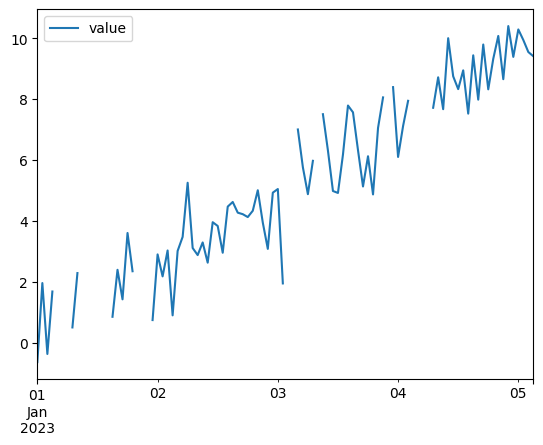

In [65]:
ts = pd.read_csv("time_series_example.csv",index_col=0)
ts.index = pd.to_datetime(ts.index)
ts.plot()

<AxesSubplot: >

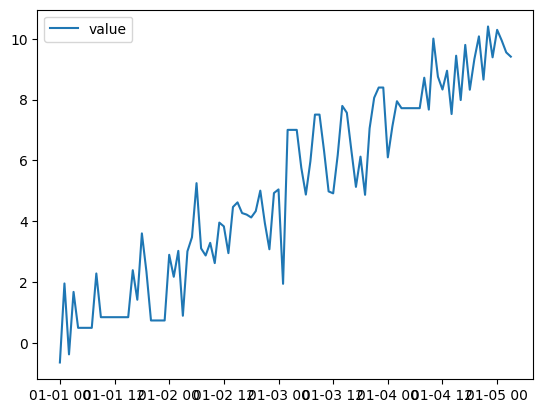

In [66]:
import seaborn as sns
sns.lineplot(data=ts.resample("H").interpolate(method="bfill",limit_direction="backward"))



In [67]:
import numpy as np
import statsmodels.api as sm

ts = ts.resample("H").interpolate(method="linear")
ts["x"] = range(len(ts))

In [68]:
model = sm.OLS(ts["value"], ts["x"])

In [69]:
results = model.fit()

<AxesSubplot: xlabel='x', ylabel='value'>

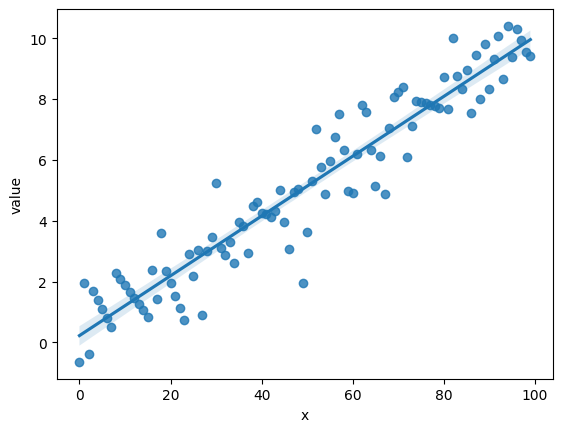

In [71]:
import seaborn as sns


sns.regplot(x='x', y='value', data=ts)


<AxesSubplot: >

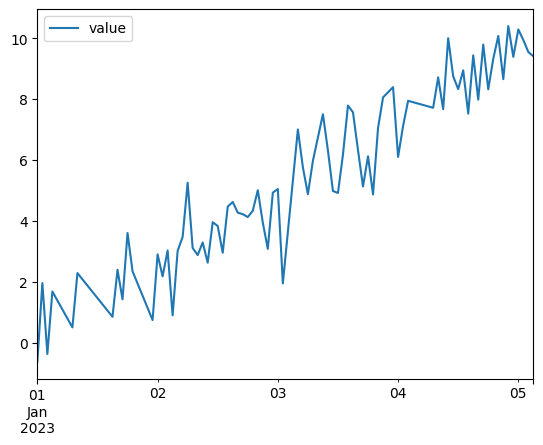

In [5]:
ts.resample("H").interpolate(method="linear").plot()

In [56]:
from statsmodels.tsa.arima.model import ARIMA
ts_int = ts.resample("H").interpolate(method="linear")
train = ts_int[:80]
test = ts_int[80:]
y = train["value"]

/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


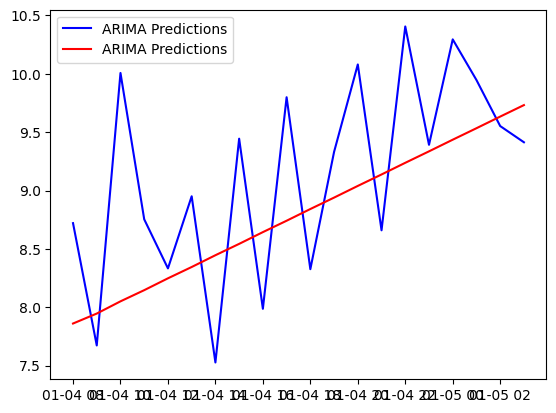

In [61]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 

y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index

y_pred_out = y_pred_df["Predictions"] 
plt.plot(test, color='Blue', label = 'ARIMA Predictions')
plt.plot(y_pred_out, color='Red', label = 'ARIMA Predictions')
plt.legend()



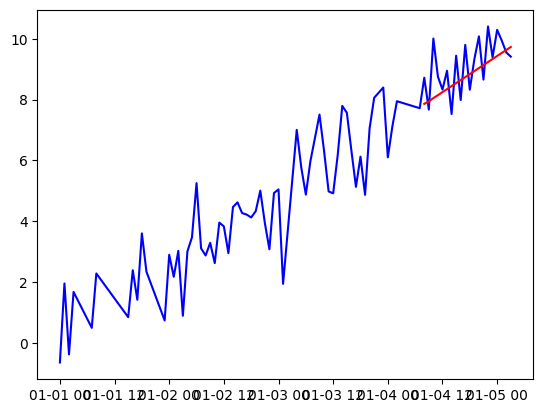

In [62]:
plt.plot(ts_int,color='Blue', label='Ground truth')
plt.plot(y_pred_out,color='Red',label="Predicted")

In [70]:
stores = pd.read_csv("retail/stores.csv")
sales = pd.read_csv("retail/sales.csv")
features = pd.read_csv("retail/features.csv")

sales["Date"] = pd.to_datetime(sales["Date"],format="%d/%m/%Y")
sales.index = sales["Date"]
sales.drop("Date",axis=1,inplace=True)

10244

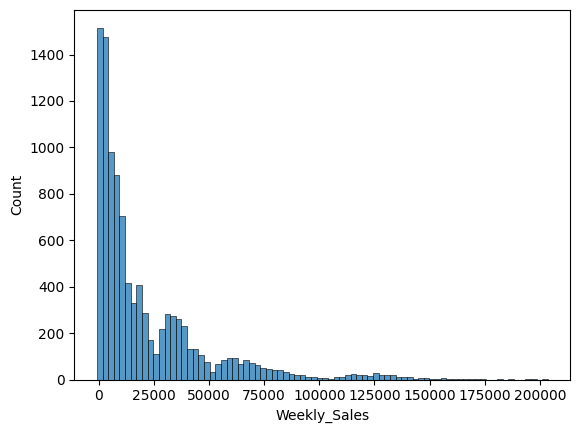

In [77]:
store_1 = sales[sales["Store"] == 1]
import seaborn as sns
sns.histplot(store_1["Weekly_Sales"])



In [86]:
store_1.interpolate(method="linear")

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False
...,...,...,...,...
2012-08-31,1,99,20.06,False
2012-09-07,1,99,0.05,True
2012-09-14,1,99,0.03,False


/var/folders/y9/gj9ysh_56cl66jgr5hgyk3q40000gn/T/ipykernel_14297/2102312311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1_dept_1["IsHoliday"] = store_1_dept_1["IsHoliday"].astype(int)


<AxesSubplot: xlabel='Date'>

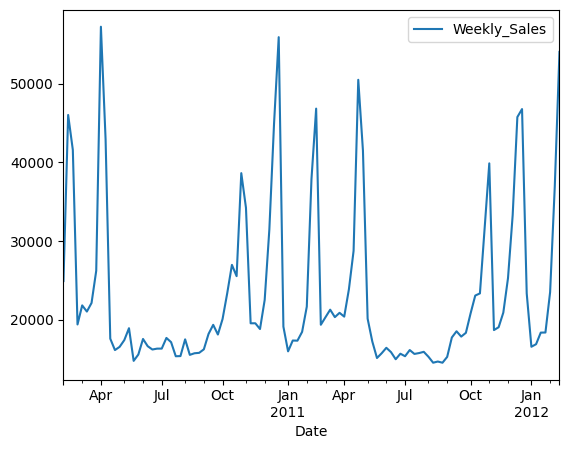

In [186]:
import math

store_1 = sales[sales["Store"] == 1].interpolate(method="linear")
store_1_dept_1 = store_1[store_1["Dept"] == 1]
store_1_dept_1["IsHoliday"] = store_1_dept_1["IsHoliday"].astype(int)

train_size = 0.75
train_rows = math.floor(len(store_1_dept_1)*train_size)
train = store_1_dept_1[:train_rows]
test = store_1_dept_1[train_rows:]


y.plot()


In [208]:
ARIMAmodel = ARIMA(
    train.loc[:,["Weekly_Sales"]],
    order = (2,1,12),
    exog=train.loc[:,["IsHoliday"]]
)
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(
    len(test.index),
    exog=test.loc[:,["IsHoliday"]]
)






/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels

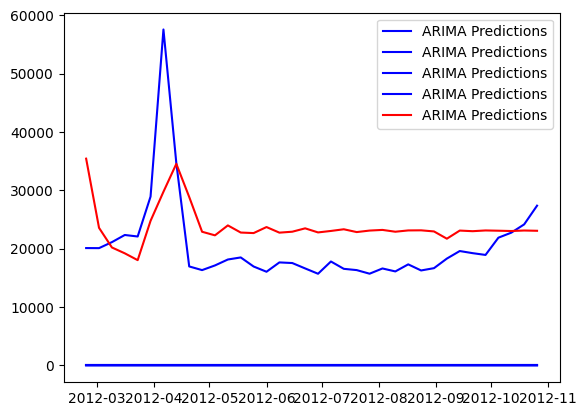

In [209]:
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(
    start = y_pred_df.index[0], 
    end = y_pred_df.index[-1],
    exog = test.loc[:,["IsHoliday"]]
)
y_pred_df.index = test.index

y_pred_out = y_pred_df["Predictions"] 
plt.plot(test, color='Blue', label = 'ARIMA Predictions')
plt.plot(y_pred_out, color='Red', label = 'ARIMA Predictions')
plt.legend()

plt.show()


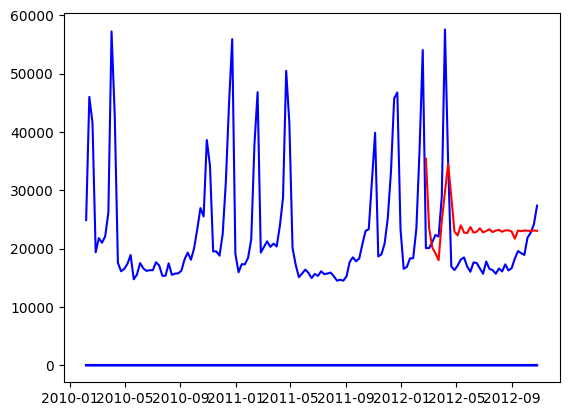

In [210]:

plt.plot(store_1_dept_1,color='Blue', label='Ground truth')
plt.plot(y_pred_out,color='Red',label="Predicted")

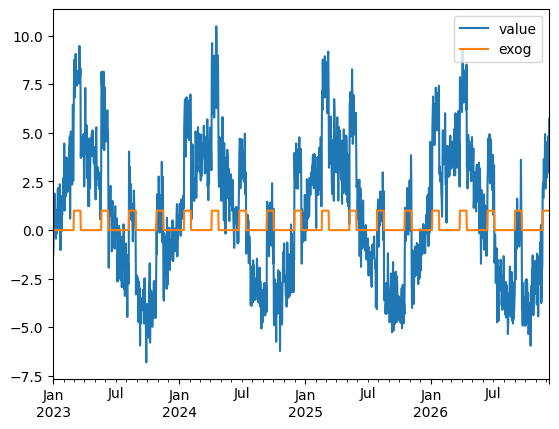

In [137]:
import numpy as np
import pandas as pd
import math

sz = 1440
dti = pd.date_range("2023-01-01", periods=sz, freq="D")
#val = np.random.normal(size=sz)+list(map(lambda x: 4*(math.sin(math.pi+x/16)+x/sz*6),range(sz)))
val = np.random.normal(size=sz)+list(map(lambda x: 4*math.sin(math.pi*x/180),range(sz)))
exog = ([0]*60+[1]*20)*int(sz/80)
exog_adj = list(map(lambda x: x * 4,exog))
ts = pd.DataFrame({"value":val+exog_adj,"exog":exog},index=dti)
ts.plot()
ts.to_csv("time_series_example_arima_exog.csv")





In [47]:
train_size = 0.75
train_rows = math.floor(len(ts)*train_size)
train = ts[:train_rows]
test = ts[train_rows:]






/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


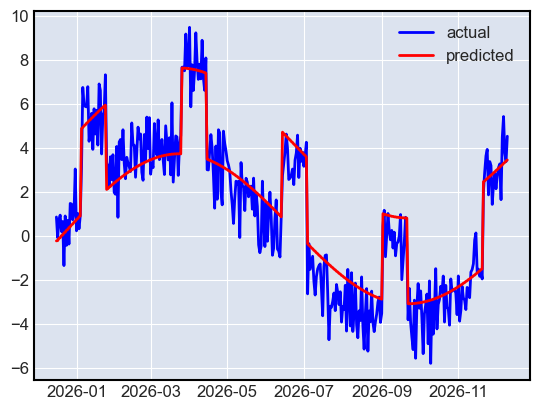

In [84]:
from statsmodels.tsa.arima.model import ARIMA

ARIMAmodel = ARIMA(train["value"], order = (4, 0, 4),exog=train["exog"])
ARIMAmodel = ARIMAmodel.fit()
pred = ARIMAmodel.predict(
    start = test.index[0], 
    end = test.index[-1],
    exog = test["exog"]
)

import matplotlib.pyplot as plt
plt.plot(test["value"], color='Blue', label = 'actual')
plt.plot(pred, color='Red', label = 'predicted')
plt.legend()

In [ ]:
## from pmdarima.arima import auto_arima
model = auto_arima(train["value"], exog=train["exog"], error_action='ignore', trace=1,  seasonal=True)

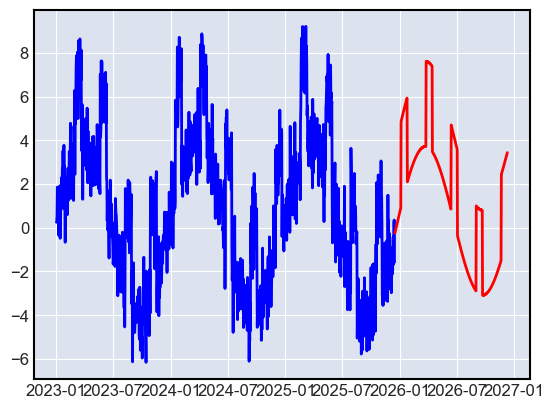

In [85]:
#model.fit(train["value"])
#pred = model.predict(n_periods=len(test["value"]),exog=test["exog"])
plt.plot(train["value"],color='Blue', label='Ground truth')
plt.plot(pred,color='Red',label="Predicted")


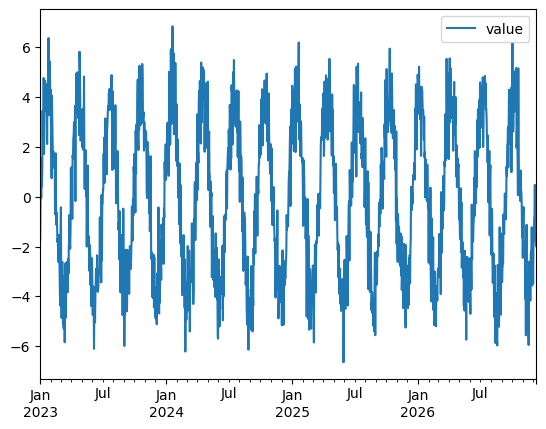

In [394]:
import numpy as np
import pandas as pd
sz = 1440
dti = pd.date_range("2023-01-01", periods=sz, freq="D")
#val = np.random.normal(size=sz)+list(map(lambda x: 4*(math.sin(math.pi+x/16)+x/sz*6),range(sz)))
val = np.random.normal(size=sz)+list(map(lambda x: 4*math.sin(math.pi*x/180*4),range(sz)))
ts = pd.DataFrame({"value":val},index=dti)
ts.plot()
ts.to_csv("time_series_example_arima.csv")



<AxesSubplot: >

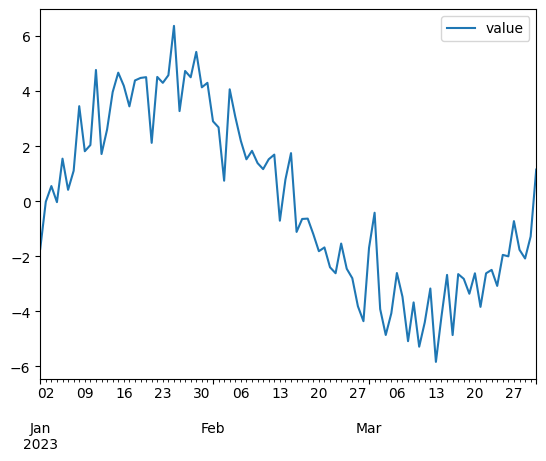

In [412]:
ts = pd.read_csv("time_series_example_arima.csv",index_col=0)
ts.index=pd.to_datetime(ts.index)


<AxesSubplot: >

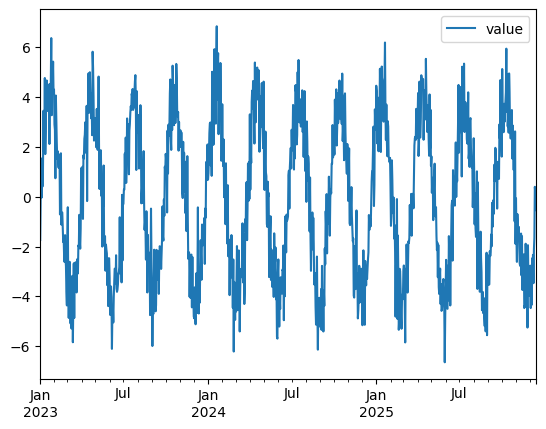

In [396]:
train_size = 0.75
train_rows = math.floor(len(ts)*train_size)
train = ts[:train_rows]
test = ts[train_rows:]
train.plot()

/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


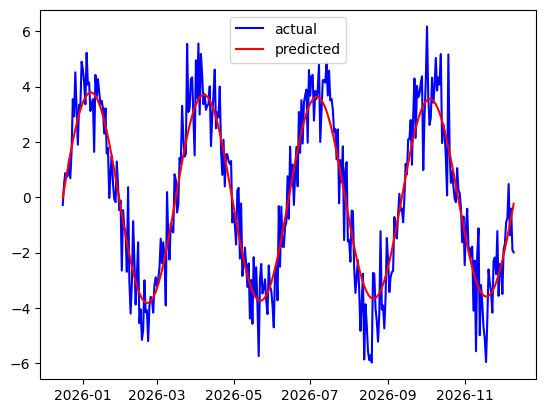

In [415]:
ARIMAmodel = ARIMA(train, order = (3, 0, 2))
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))

y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(
    start = y_pred_df.index[0], 
    end = y_pred_df.index[-1]
)
y_pred_df.index = test.index

y_pred_out = y_pred_df["Predictions"] 
plt.plot(test, color='Blue', label = 'actual')
plt.plot(y_pred_out, color='Red', label = 'predicted')
plt.legend()

plt.show()

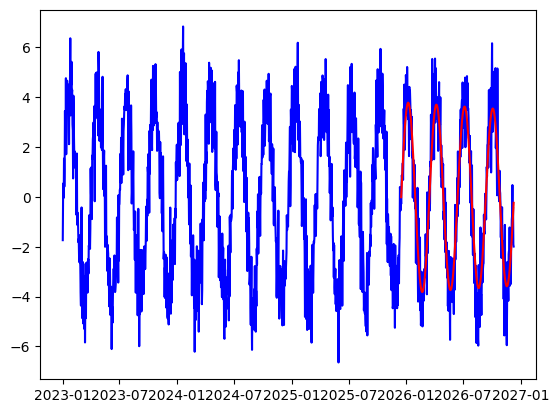

In [416]:

plt.plot(ts,color='Blue', label='Ground truth')
plt.plot(y_pred_out,color='Red',label="Predicted")

In [413]:
from pmdarima.arima import auto_arima
model = auto_arima(train, error_action='ignore', trace=1,  seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3157.765, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5457.422, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3819.493, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4765.223, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5455.679, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3515.034, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3518.274, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3145.662, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3515.862, Time=0.15 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=3196.993, Time=0.56 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3163.968, Time=0.49 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3514.789, Time=0.15 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=i

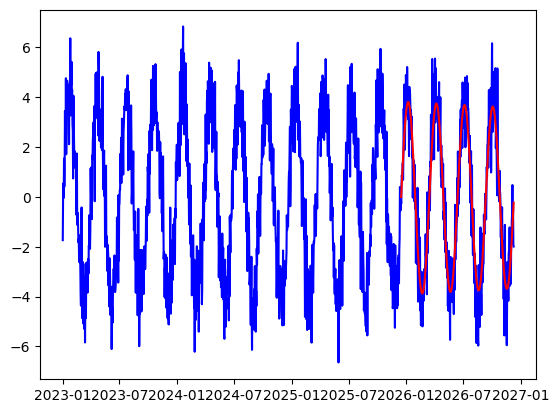

In [414]:
#model.fit(train)
pred = model.predict(n_periods=len(test))
plt.plot(ts,color='Blue', label='Ground truth')
plt.plot(pred,color='Red',label="Predicted")

In [ ]:
#plot the predictions for validation set
plt.plot(time_train,train, label='train')
plt.plot(time_test,test, label='test')
plt.plot(time_train, prediction1, label='prediction1')
plt.plot(time_test, prediction2, label='prediction2')
plt.legend()
plt.show()

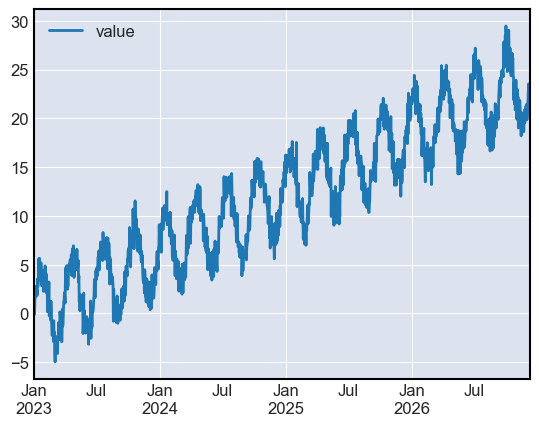

In [86]:
import numpy as np
import pandas as pd
sz = 1440
dti = pd.date_range("2023-01-01", periods=sz, freq="D")
#val = np.random.normal(size=sz)+list(map(lambda x: 4*(math.sin(math.pi+x/16)+x/sz*6),range(sz)))
val = np.random.normal(size=sz)+list(map(lambda x: 4*math.sin(math.pi*x/180*4)+x/sz*24,range(sz)))
ts = pd.DataFrame({"value":val},index=dti)
ts.plot()
ts.to_csv("time_series_example_arima_moving.csv")



<AxesSubplot: >

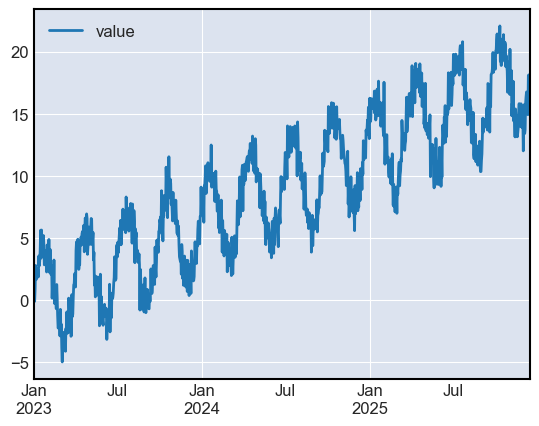

In [87]:
ts = pd.read_csv("time_series_example_arima_moving.csv",index_col=0)
ts.index=pd.to_datetime(ts.index)
train_size = 0.75
train_rows = math.floor(len(ts)*train_size)
train = ts[:train_rows]
test = ts[train_rows:]
train.plot()

/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


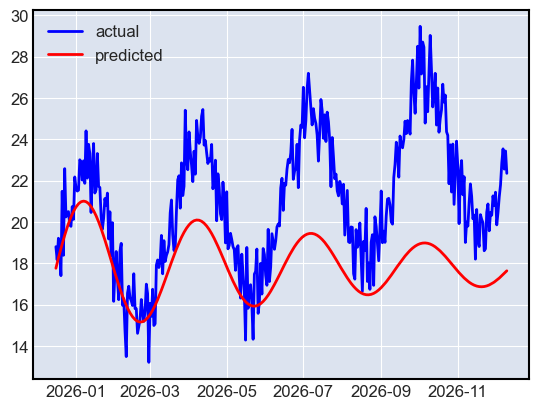

In [130]:
def sse(test,pred):
    df = pd.DataFrame({"actual":test["value"],"predicted":pred})
    df["err"] = (df["actual"]-df["predicted"])**2
    return sum(df["err"])

ARIMAmodel = ARIMA(train, order = (4, 1, 4)).fit()
pred = ARIMAmodel.predict(
    start = test.index[0], 
    end = test.index[-1]
)

plt.plot(test, color='Blue', label = 'actual')
plt.plot(pred, color='Red', label = 'predicted')
plt.legend()

plt.show()



In [127]:
min_error = 1e10
best_model = None
best_p = None
best_d = None
best_q = None

for p in range(7):
    for d in range(7):
        for q in range(7):
            print(p,d,q)
            ARIMAmodel = ARIMA(train, order = (p, d, q)).fit()
            pred = ARIMAmodel.predict(
                start = test.index[0], 
                end = test.index[-1]
            )
            tmp = sse(test,pred)
            if tmp < min_error:
                best_model = ARIMAmodel
                best_p, best_d, best_q = p, d, q


0 0 0
0 0 1
0 0 2
0 0 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

0 0 4
0 0 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

0 0 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

0 1 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0 2 0
0 2 1
0 2 2
0 2 3
0 2 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

0 2 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 2 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 3 0
0 3 1
0 3 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

0 3 3
0 3 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/ts

0 3 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 3 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 4 0
0 4 1
0 4 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

0 4 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

0 4 4
0 4 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 4 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

0 5 0
0 5 1
0 5 2
0 5 3
0 5 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/ts

0 5 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

0 5 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

0 6 0
0 6 1
0 6 2
0 6 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 6 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 6 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

0 6 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

1 0 0
1 0 1
1 0 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

1 0 3
1 0 4
1 0 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1 0 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1 1 0
1 1 1
1 1 2
1 1 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

1 1 4
1 1 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

1 1 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1 2 0
1 2 1
1 2 2
1 2 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

1 2 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

1 2 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

1 2 6
1 3 0
1 3 1
1 3 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

1 3 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 3 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

1 3 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

1 3 6
1 4 0
1 4 1
1 4 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

1 4 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

1 4 4
1 4 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 4 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 5 0
1 5 1
1 5 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

1 5 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 5 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

1 5 5
1 5 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 6 0
1 6 1
1 6 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

1 6 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 6 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 6 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

1 6 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

2 0 0
2 0 1
2 0 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2 0 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2 0 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

2 0 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2 0 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

2 1 0
2 1 1
2 1 2
2 1 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2 1 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2 1 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2 1 6
2 2 0
2 2 1


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

2 2 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

2 2 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

2 2 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2 2 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2 2 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

2 3 0
2 3 1
2 3 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 3 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 3 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

2 3 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

2 3 6
2 4 0
2 4 1


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

2 4 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 4 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 4 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

2 4 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

2 4 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

2 5 0
2 5 1
2 5 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 5 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 5 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

2 5 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

2 5 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

2 6 0
2 6 1
2 6 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 6 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 6 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

2 6 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

2 6 6
3 0 0
3 0 1


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

3 0 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


3 0 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsm

3 0 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

3 0 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

3 0 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

3 1 0
3 1 1
3 1 2
3 1 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

3 1 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

3 1 5
3 1 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

3 2 0
3 2 1
3 2 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

3 2 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

3 2 4
3 2 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

3 2 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

3 3 0
3 3 1
3 3 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

3 3 3
3 3 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

3 3 5
3 3 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

3 4 0
3 4 1
3 4 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

3 4 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarim

3 4 4
3 4 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 4 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 5 0
3 5 1


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

3 5 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 5 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

3 5 4
3 5 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

3 5 6
3 6 0
3 6 1


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

3 6 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 6 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.

3 6 4
3 6 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 6 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 0 0
4 0 1


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

4 0 2


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

4 0 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


4 0 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


4 0 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


4 0 6


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.p

4 1 0
4 1 1
4 1 2
4 1 3


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsm

4 1 4


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


4 1 5


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


4 1 6
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/y9/gj9ysh_56cl66jgr5hgyk3q40000gn/T/ipykernel_15217/2076527910.py", line 11, in <cell line: 7>
    ARIMAmodel = ARIMA(train, order = (p, d, q)).fit()
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/arima/model.py", line 390, in fit
    res = super().fit(
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py", line 563, in fit
    xopt, retvals, optim_settings = optimizer._fit(f, score, start_params,
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/optimi

In [128]:
print(best_p,best_d,best_q)

4 1 5


In [123]:
def sse(test,pred):
    df = pd.DataFrame({"actual":test["value"],"predicted":pred})
    df["err"] = (df["actual"]-df["predicted"])**2
    return sum(df["err"])

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(train, error_action='ignore', trace=1,  seasonal=True, stationary=False, m=90)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[90] intercept   : AIC=inf, Time=82.46 sec
 ARIMA(0,1,0)(0,0,0)[90] intercept   : AIC=3773.171, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[90] intercept   : AIC=3518.592, Time=9.74 sec
 ARIMA(0,1,1)(0,0,1)[90] intercept   : AIC=3441.586, Time=11.85 sec
 ARIMA(0,1,0)(0,0,0)[90]             : AIC=3771.304, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[90] intercept   : AIC=3450.409, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[90] intercept   : AIC=inf, Time=55.91 sec
 ARIMA(0,1,1)(0,0,2)[90] intercept   : AIC=3434.474, Time=54.72 sec
 ARIMA(0,1,1)(1,0,2)[90] intercept   : AIC=inf, Time=262.92 sec
 ARIMA(0,1,0)(0,0,2)[90] intercept   : AIC=3777.124, Time=29.97 sec
 ARIMA(1,1,1)(0,0,2)[90] intercept   : AIC=3430.030, Time=73.47 sec
 ARIMA(1,1,1)(0,0,1)[90] intercept   : AIC=3436.588, Time=15.17 sec
 ARIMA(1,1,1)(1,0,2)[90] intercept   : AIC=inf, Time=324.39 sec
 ARIMA(1,1,1)(1,0,1)[90] intercept   : AIC=inf, Time=75.62 sec
 ARIMA(1,1,0)(0,0,2)[90] interce

In [ ]:
model.fit(train)
pred = model.predict(n_periods=len(test))
plt.plot(ts,color='Blue', label='Ground truth')
plt.plot(pred,color='Red',label="Predicted")

In [ ]:
import pandas as pd
dates = pd.to_datetime(["22-01-01","22-01-05","22-01-12","22-01-20","22-01-21"],format="%y-%m-%d")
sales = [1000000,1005000,1001000,1003000,1006000]


ts = pd.Series(sales, index=dates)

ts = ts.resample("D")

ts.interpolate(method='spline', order=3).plot()
ts.interpolate(method='time').plot()
lines, labels = plt.gca().get_legend_handles_labels()
labels = ['spline', 'time']
plt.legend(lines, labels, loc='best')
plt.show()

In [15]:
qcom = pd.read_csv("QCOM.csv")[:360]
qcom["Date"] = pd.to_datetime(qcom["Date"])
qcom.index = qcom["Date"]
financial_cols = ["Close/Last","Open","High","Low"]

def clean_dollar(s):
    return float(s.replace("$",""))

for col in financial_cols:
    qcom[col] = qcom[col].apply(clean_dollar)
    
qcom.rename({"Close/Last":"Close"},axis=1,inplace=True)

In [14]:


qcom.interpolate(method='ffill').plot()
qcom.interpolate(method='spline',order=3).plot()
lines, labels = plt.gca().get_legend_handles_labels()
labels = ['spline', 'time']
plt.legend(lines, labels, loc='best')
plt.show()

Unexpected exception formatting exception. Falling back to standard exception
Error in callback <function _draw_all_if_interactive at 0x10f57fca0> (for post_execute):
Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/y9/gj9ysh_56cl66jgr5hgyk3q40000gn/T/ipykernel_15217/3734467630.py", line 2, in <cell line: 2>
    qcom.interpolate(method='spline',order=3).plot()
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/pandas/util/_decorators.py", line 317, in wrapper
    return func(*args, **kwargs)
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py", line 11877, in interpolate
    return super().interpolate(
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py", line 7573, in interpolate
    new_data = obj._mgr.interpolate(
  File "/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/pandas/core/internals/managers.py", line 420, in interpolate
    return self.apply("interpol

<Figure size 640x480 with 1 Axes>

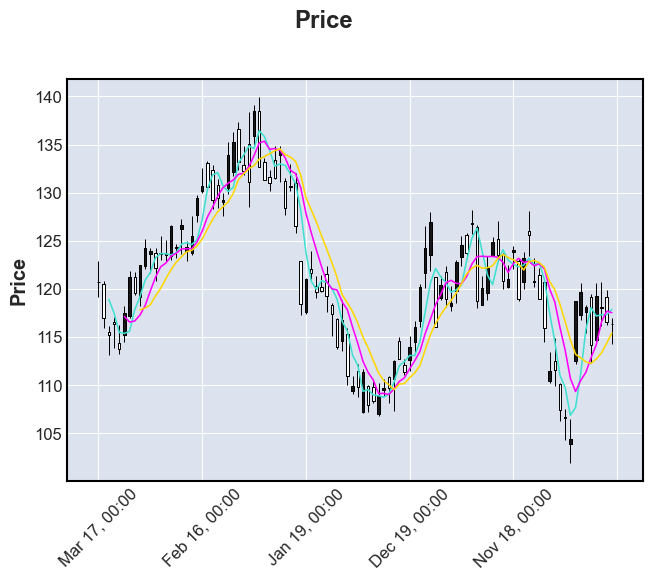

In [16]:
import mplfinance as mpl 
mpl.plot(
    qcom[:100],
    type="candle", 
    mav =(3,6,9),
    title = "Price",
    style="default"
)

<AxesSubplot: xlabel='Date'>

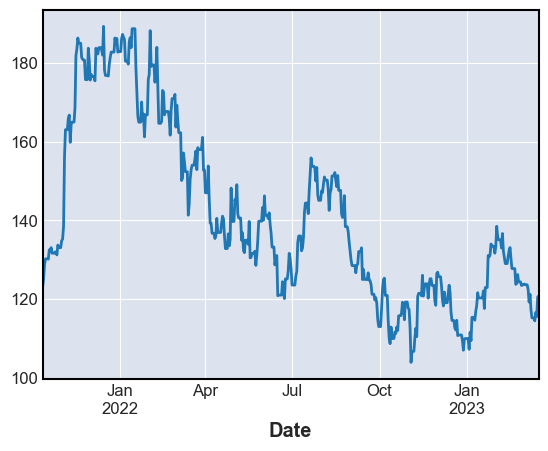

In [25]:
qcom["Close"].resample("D").interpolate(method="ffill").plot()

In [176]:
pizza = pd.read_csv("https://github.com/tobypenk/data-bootcamp/blob/main/week%207/pizza/orders.csv?raw=true")

In [177]:
pizza["orderDate"] = pd.to_datetime(pizza["orderDate"],utc=True)

In [178]:
pizza.sort_values("orderDate")

,id,customerId,storeId,orderDate,nItems,total
319090,319090,C786361,S013343,2020-01-01 19:02:35+00:00,1,16.99
545586,545586,C956027,S263879,2020-01-01 19:35:17+00:00,1,19.99
407818,407818,C562166,S490972,2020-01-01 19:38:03+00:00,1,16.99
1001427,1001427,C805215,S750231,2020-01-01 20:04:09+00:00,1,19.99
227639,227639,C262525,S948821,2020-01-01 20:05:19+00:00,1,18.99
...,...,...,...,...,...,...
99160,99160,C877602,S396799,2022-12-31 05:53:26+00:00,2,41.98
788979,788979,C280899,S351225,2022-12-31 05:57:45+00:00,1,16.99
6233,6233,C993249,S490972,2022-12-31 06:27:14+00:00,1,12.99
784861,784861,C265215,S476770,2022-12-31 06:49:53+00:00,1,14.99


/var/folders/y9/gj9ysh_56cl66jgr5hgyk3q40000gn/T/ipykernel_15217/307827354.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pizza[pizza["storeId"] == "S302800"].resample("D").sum().plot()


<AxesSubplot: xlabel='orderDate'>

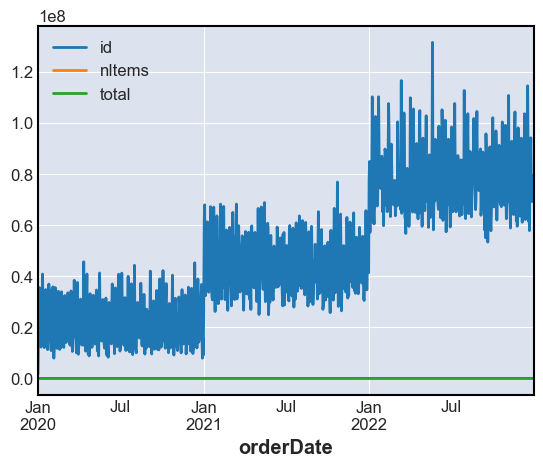

In [181]:
pizza.index = pizza.orderDate
pizza[pizza["storeId"] == "S302800"].resample("D").sum().plot()

In [147]:
pizza

,id,customerId,storeId,orderDate,nItems,total
0,0,C501741,S302800,2021-04-11 00:05:37+00:00,1,22.99
1,1,C896243,S750231,2022-06-11 02:12:49+00:00,2,27.98
2,2,C720657,S799887,2022-06-13 20:18:55+00:00,1,12.99
3,3,C647388,S688745,2022-11-12 07:06:27+00:00,1,15.99
4,4,C521597,S688745,2020-05-21 02:41:23+00:00,1,15.99
...,...,...,...,...,...,...
1048570,1048570,C663752,S064089,2020-04-04 00:17:21+00:00,2,35.98
1048571,1048571,C479324,S062214,2021-03-05 01:24:34+00:00,1,22.99
1048572,1048572,C476032,S476770,2020-02-01 23:49:55+00:00,1,23.99
1048573,1048573,C604677,S688745,2020-01-27 03:58:41+00:00,1,22.99


In [148]:
customers = pd.read_csv("https://github.com/tobypenk/data-bootcamp/raw/main/week%207/pizza/customers.csv")

In [149]:
customers

,id,latitude,longitude
0,C772113,39.656183,-120.270048
1,C314977,39.795088,-116.006403
2,C802329,41.596104,-117.422433
3,C029919,34.651128,-120.478539
4,C945441,37.380307,-121.634988
...,...,...,...
34756,C455354,37.232604,-119.227862
34757,C728348,38.989312,-122.036864
34758,C324473,34.617627,-120.404965
34759,C571487,41.317374,-116.131307


In [ ]:
stores = "https://github.com/tobypenk/data-bootcamp/raw/main/week%207/pizza/stores.csv"

In [97]:
url3 = "https://github.com/tobypenk/data-bootcamp/raw/main/week%207/time_series_example_arima_exog.csv"
ts3 = pd.read_csv(url3,index_col=0)
ts3.index = pd.to_datetime(ts3.index)
ts3

,value,exog
2023-01-01,0.249983,0
2023-01-02,0.289531,0
2023-01-03,0.560632,0
2023-01-04,1.860371,0
2023-01-05,0.332302,0
...,...,...
2026-12-06,4.474737,1
2026-12-07,5.411417,1
2026-12-08,3.744764,1
2026-12-09,3.365190,1


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


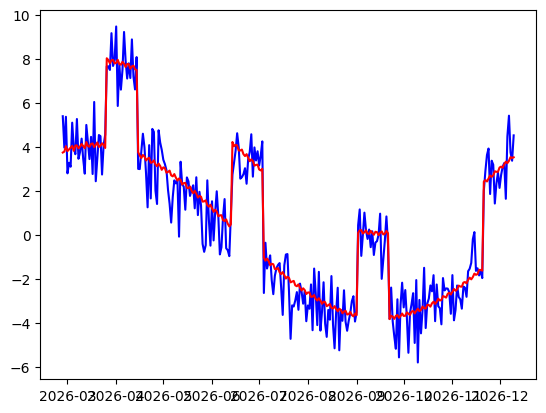

In [98]:
train_portion = 0.8
train_rows = math.floor(len(ts3)* train_portion)
train = ts3[:train_rows]
test = ts3[train_rows:]

model = ARIMA(train["value"],order=(8,0,10),exog=train["exog"])
model = model.fit()
predictions = model.predict(
    start = test.index[0],
    end = test.index[-1],
    exog = test["exog"]
)

plt.plot(test["value"],color="blue",label="actuals")
plt.plot(predictions,color="red",label="predicted")

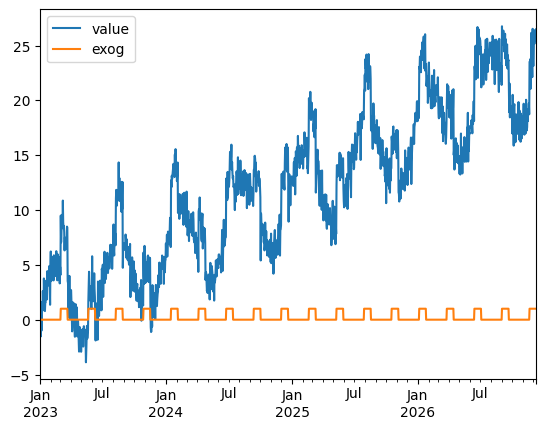

In [99]:
import numpy as np
import pandas as pd
import math

sz = 1440
dti = pd.date_range("2023-01-01", periods=sz, freq="D")
#val = np.random.normal(size=sz)+list(map(lambda x: 4*(math.sin(math.pi+x/16)+x/sz*6),range(sz)))
val = np.random.normal(size=sz)+list(map(lambda x: 4*math.sin(math.pi*x/90)+x*22/sz,range(sz)))
exog = ([0]*60+[1]*20)*int(sz/80)
exog_adj = list(map(lambda x: x * 4,exog))
ts = pd.DataFrame({"value":val+exog_adj,"exog":exog},index=dti)
ts.plot()
ts.to_csv("time_series_example_arima_exog_nonstat.csv")

In [91]:
train_portion = 0.8
train_rows = math.floor(len(ts)* train_portion)
train = ts[:train_rows]
test = ts[train_rows:]


/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


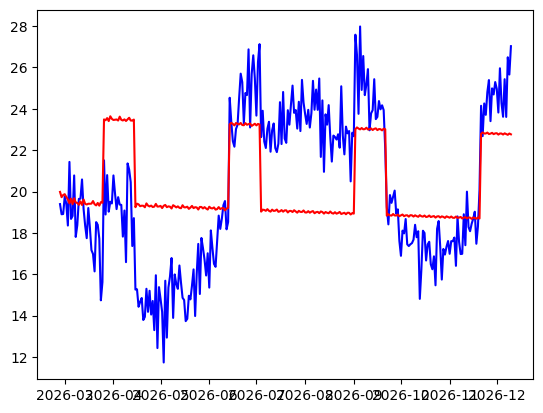

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from statsmodels.tsa.arima.model import ARIMA
#15,1,11
model = ARIMA(train["value"],order=(8,0,10),exog=train["exog"])
model = model.fit()
predictions = model.predict(
    start = test.index[0],
    end = test.index[-1],
    exog=test["exog"]
)

plt.plot(test["value"],color="blue",label="actuals")
plt.plot(predictions,color="red",label="predicted")

In [ ]:
# import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(train["value"],order=(8, 0, 10),seasonal_order=(8, 0, 10, 90),exog=train["exog"])
results=model.fit()

pred = results.predict(start=test.index[0],end=test.index[-1],exog=test["exog"])

plt.plot(test["value"],color="blue",label="actuals")
plt.plot(pred,color="red",label="predicted")

/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tobypenk/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [107]:
1440/80

18.0

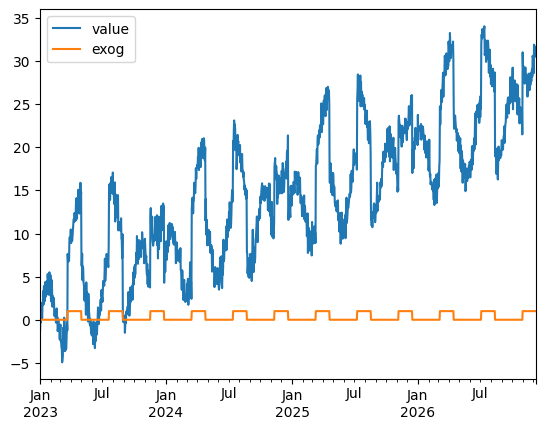

In [110]:
import numpy as np
import pandas as pd
sz = 1440
dti = pd.date_range("2023-01-01", periods=sz, freq="D")
#val = np.random.normal(size=sz)+list(map(lambda x: 4*(math.sin(math.pi+x/16)+x/sz*6),range(sz)))
val = np.random.normal(size=sz)+list(map(lambda x: 4*math.sin(math.pi*x/180*4)+x/sz*24,range(sz)))
exog = ([0]*80+[1]*40)*int(sz/120)
exog_adj = list(map(lambda x: x * 8,exog))
ts = pd.DataFrame({"value":val+exog_adj,"exog":exog},index=dti)
ts.plot()


train_portion = 0.8
train_rows = math.floor(len(ts)* train_portion)
train = ts[:train_rows]
test = ts[train_rows:]




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55749D+00    |proj g|=  2.55252D-01


 This problem is unconstrained.



At iterate    5    f=  1.43328D+00    |proj g|=  2.27980D-02

At iterate   10    f=  1.41596D+00    |proj g|=  5.56391D-03

At iterate   15    f=  1.41341D+00    |proj g|=  2.77848D-03

At iterate   20    f=  1.41322D+00    |proj g|=  4.27582D-04

At iterate   25    f=  1.41320D+00    |proj g|=  5.11956D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     48      1     0     0   2.371D-04   1.413D+00
  F =   1.4131946970171205     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


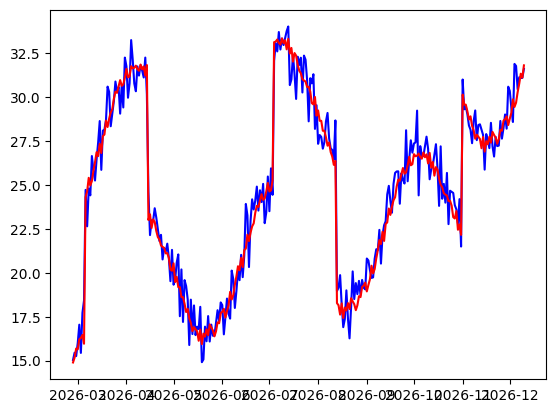

In [111]:
# import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(train["value"],order=(0,1,1),seasonal_order=(0,1,1, 90),exog=train["exog"])
results=model.fit()

pred = results.predict(start=test.index[0],end=test.index[-1],exog=test["exog"])

plt.plot(test["value"],color="blue",label="actuals")
plt.plot(pred,color="red",label="predicted")

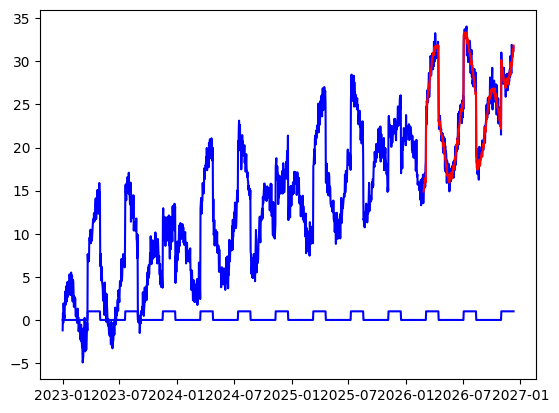

In [112]:

plt.plot(ts,color="blue",label="actuals")
plt.plot(pred,color="red",label="predicted")

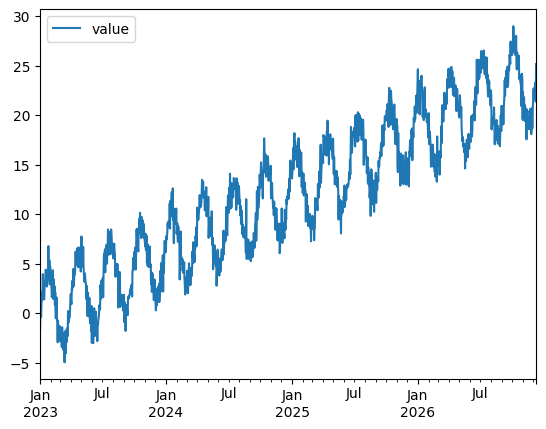

In [122]:
import numpy as np
import pandas as pd
sz = 1440
dti = pd.date_range("2023-01-01", periods=sz, freq="D")
#val = np.random.normal(size=sz)+list(map(lambda x: 4*(math.sin(math.pi+x/16)+x/sz*6),range(sz)))
val = np.random.normal(size=sz)+list(map(lambda x: 4*math.sin(math.pi*x/180*4)+x/sz*24,range(sz)))
ts = pd.DataFrame({"value":val},index=dti)
ts.plot()


train_portion = 0.8
train_rows = math.floor(len(ts)* train_portion)
train = ts[:train_rows]
test = ts[train_rows:]





RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54240D+00    |proj g|=  2.51544D-01


 This problem is unconstrained.



At iterate    5    f=  1.42356D+00    |proj g|=  1.96948D-02

At iterate   10    f=  1.40106D+00    |proj g|=  9.03692D-03

At iterate   15    f=  1.39886D+00    |proj g|=  1.57557D-03

At iterate   20    f=  1.39859D+00    |proj g|=  7.89398D-04

At iterate   25    f=  1.39857D+00    |proj g|=  1.23928D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     47      1     0     0   2.685D-04   1.399D+00
  F =   1.3985685532195542     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


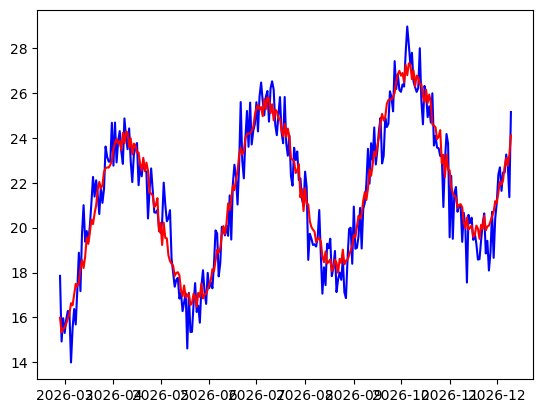

In [123]:
# import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(train["value"],order=(0,1,1),seasonal_order=(0,1,1, 90))
results=model.fit()

pred = results.predict(start=test.index[0],end=test.index[-1])

plt.plot(test["value"],color="blue",label="actuals")
plt.plot(pred,color="red",label="predicted")

In [131]:
forecast_period = pd.date_range(test.index[-1] + pd.Timedelta("1D"),periods=500,freq="1D")
forecast_period = pd.DataFrame(index=forecast_period)

In [132]:
pred = results.predict(start=forecast_period.index[0],end=forecast_period.index[-1])
forecast_period["value"] = pred

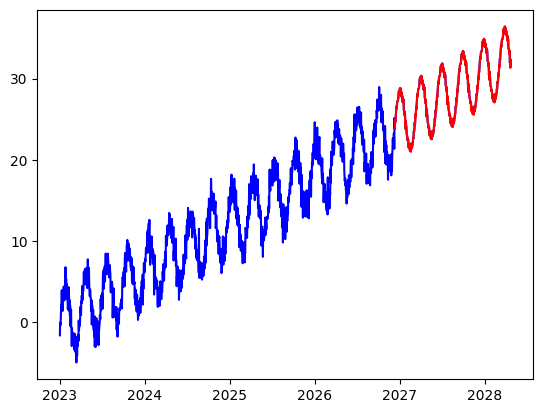

In [136]:
plt.plot(pd.concat([ts,forecast_period]),color="blue")
plt.plot(forecast_period,color="red")